In [110]:
#CS506_FL 23_PE06: Chloe Lee
import numpy as np
import pandas as pd



In [111]:
#part1
winereview = pd.read_csv('PE06_winereview.csv')
winereview.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


C:\Users\leechloe\AppData\Local\Temp\ipykernel_24332\96932049.py:4: FutureWarning: The provided callable <function sum at 0x000001E56758C7C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grp =grp.aggregate(np.sum)


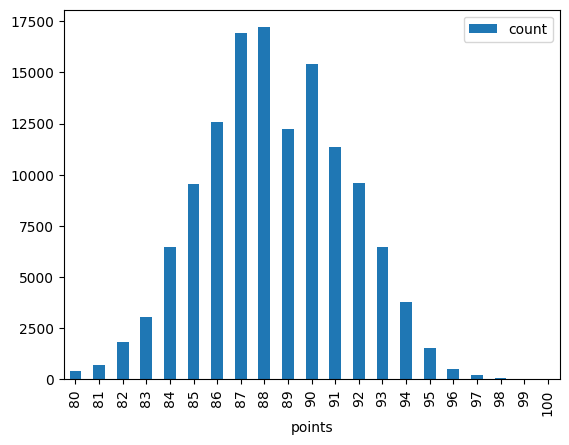

In [21]:
val_counted= winereview.points.value_counts()
my_df = pd.DataFrame(val_counted)
grp = my_df.groupby('points')
grp =grp.aggregate(np.sum)
plt1 =grp.plot.bar()

In [ ]:
#part2 : histogram w/ hist()

0    (80, 90]
1    (80, 90]
2    (80, 90]
3    (80, 90]
4    (80, 90]
Name: points, dtype: category
Categories (2, interval[int64, right]): [(80, 90] < (90, 100]]


Text(0, 0.5, 'Frequency')

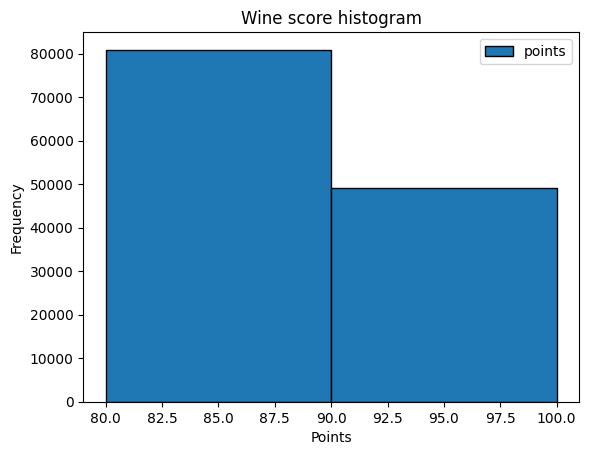

In [70]:
#Bin size 10
#with pd.cut(), each bin size incremented by 10 would have 3 categories 
binsize10 =pd.cut(winereview.points,[80,90,100])
print(binsize10.head())
#create dataframe w/ points column to process
df_hist1 = pd.DataFrame(winereview.points)
#2 categories from pd.cut = 2 bins for histogram
fig1 =df_hist1.plot.hist(bins=2,edgecolor ='black')  
fig1.set_title("Wine score histogram")
fig1.set_xlabel("Points")
fig1.set_ylabel("Frequency")


0    (84, 87]
1    (84, 87]
2    (84, 87]
3    (84, 87]
4    (84, 87]
Name: points, dtype: category
Categories (6, interval[int64, right]): [(81, 84] < (84, 87] < (87, 90] < (90, 93] < (93, 96] < (96, 99]]


Text(0, 0.5, 'Frequency')

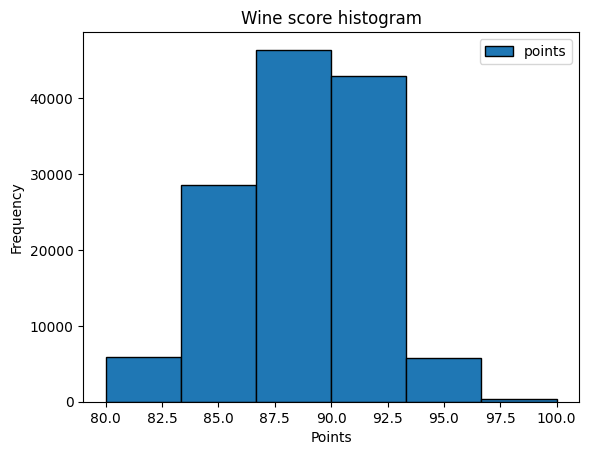

In [71]:
#Bin size 3
#w/ pd.cut(),each bin size incremented by 3 would have 6 categories
bin_size3 = list(range(81,100,3))
binsize3 = pd.cut(winereview.points, bin_size3)
print(binsize3.head())
df_hist2 = pd.DataFrame(winereview.points)
#6 categories = 6 bins for histogram
fig2=df_hist2.plot.hist(bins=6, edgecolor ='black')
fig2.set_title("Wine score histogram")
fig2.set_xlabel("Points")
fig2.set_ylabel("Frequency")

In [187]:
#part3
#w/ pd.cut(),each bin size incremented by 5 would have categories
df_price = winereview['price']
#pd.isna(df_price)
s_price = pd.Series(df_price.dropna())

print('\n')
print(df_price.describe())




count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64


1    (10, 15]
2    (10, 15]
3    (10, 15]
4    (60, 65]
5    (10, 15]
Name: price, dtype: category
Categories (660, interval[int64, right]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (3280, 3285] < (3285, 3290] < (3290, 3295] < (3295, 3300]]


Text(0, 0.5, 'Frequency')

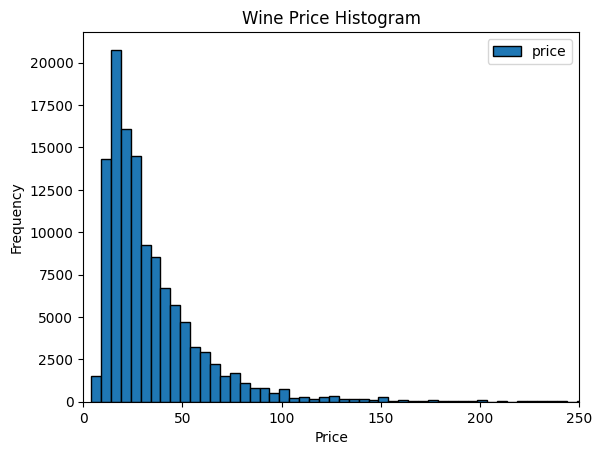

In [188]:

bin_size5 = list(range(0,3305,5))
binsize5 = pd.cut(s_price, bin_size5)
print(binsize5.head())
#create dataframe for price to process histogram plot
df_hist3 = pd.DataFrame(s_price)
# 660 categories =  660 bins for histogram
fig3=df_hist3.plot.hist(bins=660, edgecolor ='black')
fig3.set_title("Wine Price Histogram")
fig3.set_xlabel("Price")
#set x axies range to exclued some outliers
fig3.set_xlim(0,250)
fig3.set_ylabel("Frequency")